# Example

In [9]:
%load_ext autoreload
%autoreload 2
import numpy as np
from fista_asdi.algorithms import PCA, FISTA_ASDI
from fista_asdi.datacube import DataCubeASDI
from hciplot import plot_frames

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1. Import data cube

In [ ]:
datacube = DataCubeASDI(folder="../data/", 
                        cube="sphere_ifs_cube_2", 
                        wavelengths="sphere_ifs_wls_2",
                        angles="sphere_ifs_pa_2",
                        psf="sphere_ifs_psf_2",
                        pxscale="sphere_ifs_pxscale_2",
                        crop_frames_number=120, 
                        adi_sampling_frame_nb=(None,None,2),
                        sdi_sampling_frame_nb=(None,None,4),
                        mask_rin=5, mask_rout=12
                        )

# Inject a fake companion
myPlanet = {"name" : "myPlanet", "angle" : 0.0, "dist" : 4*datacube.mean_fwhm, "flux" : 5*np.ones(datacube.W)}
datacube.inject_companions(myPlanet)
datacube.find_scale_vector_preproc()

Cube array shape: (39, 112, 200, 200)
Angles array shape: (112,)
Wavelengths array shape: (39,)
PSF array shape: (39, 51, 51)
New shape: (39, 112, 120, 120)


### 2. Run post-processing algorithms

In [49]:
pca = PCA(datacube, params=30, verbose=True)
pca.run()

starting post-processing
1.0
Convergence after 1 iterations
Total running time for post-processing: 6.188523570002872
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2024-11-26 14:16:45
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
S/N map created using 4 processes
Running time:  0:00:11.712596
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


In [56]:
fista_asdi = FISTA_ASDI(datacube, params=(40,2), MAX_ITER=200, verbose=4)
fista_asdi.run()

starting post-processing
0.0010327383730101467
1 1.0 8.831789760915854 38403.32384359361 0.0010327383730101467
2 0.429775562867941 5.199532184567943 38398.12431140904 0.0010327383730101467
3 0.31298692780084086 4.45756353566685 38393.66674787337 0.0010327383730101467
4 0.24143503522083445 3.649474381651089 38390.01727349172 0.0010327383730101467
5 0.1929885494988016 2.9077201862164657 38387.109553305505 0.0010327383730101467
6 0.15806734926881602 2.280052984773647 38384.82950032073 0.0010327383730101467
7 0.13183448714016205 1.7724424015614204 38383.05705791917 0.0010327383730101467
8 0.1119228958467102 1.3913231332990108 38381.66573478587 0.0010327383730101467
9 0.0965068169094028 1.1102727443358162 38380.555462041535 0.0010327383730101467
10 0.08460982176886322 0.9124774289884954 38379.64298461255 0.0010327383730101467
11 0.0750690359355913 0.7644213662279071 38378.87856324632 0.0010327383730101467
12 0.06708897457221834 0.6487938969075913 38378.22976934941 0.0010327383730101467
13 0

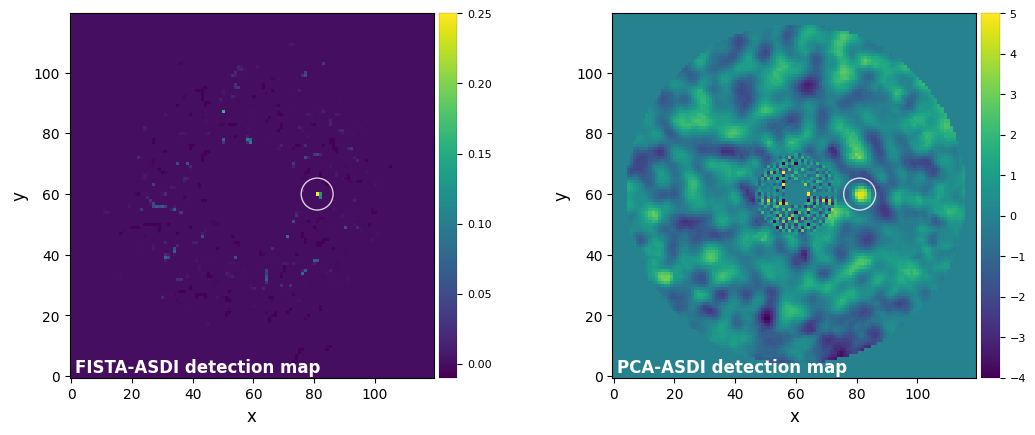

In [64]:
plot_frames((fista_asdi.detection_map, pca.detection_map), 
            circle=datacube.injections["myPlanet"]['yx'][::-1], 
            label=("FISTA-ASDI detection map", "PCA-ASDI detection map"),
            vmin=(-0.01, -4), vmax=(0.25, 5), circle_radius=datacube.mean_fwhm) 